In [9]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import joblib
from utils.data_loader import load_as_maps
from models.unet import build_unet

In [ ]:
# Specify datasets that should be used for training
datasets=["exp1","exp5","exp6","exp7"]

# Specify index of target variable
# 0 for fco2
# 1 for fco2_pre 
# 2 for co2flux 
# 3 for co2flux_pre
target_index = 3 

# Specify model parameters
lr = 0.0002
batch_size = 2
base_filters = 64
dropout_rate = 0.1
kernel_size= (3,3)
n_epochs = 100

In [ ]:
# load data
features, targets = load_as_maps(datasets=datasets, target_index=target_index)

# split data
X_train = features[:int(0.8 * len(features))]
Y_train = targets[:int(0.8 * len(targets))]
X_val = features[int(0.8 * len(features)):int(0.9 * len(features))]
Y_val = targets[int(0.8 * len(targets)):int(0.9 * len(targets))]
X_test = features[int(0.9 * len(features)):]
Y_test = targets[int(0.9 * len(targets)):]

# scale data
scaler = MinMaxScaler()
n_samples, h, w, n_features = X_train.shape
X_train_flat = X_train.reshape(-1,n_features)
X_train_scaled_flat = scaler.fit_transform(X_train_flat)
X_train = X_train_scaled_flat.reshape(n_samples, h, w, n_features)


n_samples, h, w, n_features = X_val.shape
X_val_flat = X_val.reshape(-1,n_features)
X_val_scaled_flat = scaler.transform(X_val_flat)
X_val = X_val_scaled_flat.reshape(n_samples, h, w, n_features)

n_samples, h, w, n_features = X_test.shape
X_test_flat = X_test.reshape(-1,n_features)
X_test_scaled_flat = scaler.transform(X_test_flat)
X_test = X_test_scaled_flat.reshape(n_samples, h, w, n_features)

# save scaler
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M')
folder_path = "../../outputs/u-net/" + timestamp
os.makedirs(folder_path, exist_ok=True)

joblib.dump(scaler, folder_path + '/scaler.pkl')

['../../outputs/u-net/2025-10-01_18-20/scaler.pkl']

In [12]:
# build model
model = build_unet((167, 360, 13),base_filters,kernel_size,dropout_rate)
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=lr), loss='mse', metrics=['mae'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 167, 360,  │          0 │ -                 │
│ (InputLayer)        │ 13)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 168, 360,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 13)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 168, 360,  │      7,552 │ zero_padding2d_1… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 168, 360,  │        256 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 168, 360,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 168, 360,  │     36,928 │ activation_14[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 168, 360,  │        256 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 168, 360,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 84, 180,   │          0 │ activation_15[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 84, 180,   │     73,856 │ max_pooling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 84, 180,   │        512 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 84, 180,   │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 84, 180,   │    147,584 │ activation_16[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 84, 180,   │        512 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_17       │ (None, 84, 180,   │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 42, 90,    │          0 │ activation_17[0]… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 42, 90,    │    295,168 │ max_pooling2d_4[

 Total params: 8,574,529 (32.71 MB)

 Trainable params: 8,568,897 (32.69 MB)

 Non-trainable params: 5,632 (22.00 KB)

In [13]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

H, W = 167, 360
mask_ch = 10

if Y_train.ndim == 3: Y_train = Y_train[..., None]
if Y_val.ndim   == 3: Y_val   = Y_val[..., None]

m_train = X_train[..., mask_ch]
m_val   = X_val[..., mask_ch]

history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val, Y_val, m_val),
    batch_size=batch_size,  
    epochs=n_epochs,  
    sample_weight=m_train,
    callbacks=[lr_scheduler, early_stopping],
    shuffle=True
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 1.2445 - mae: 1.3593 - val_loss: 1.3579 - val_mae: 0.6920 - learning_rate: 2.0000e-04
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.9084 - mae: 1.4185 - val_loss: 1.3557 - val_mae: 0.6785 - learning_rate: 2.0000e-04
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.6772 - mae: 1.2850 - val_loss: 1.3550 - val_mae: 0.6721 - learning_rate: 2.0000e-04
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.6201 - mae: 1.3121 - val_loss: 1.3551 - val_mae: 0.6741 - learning_rate: 2.0000e-04
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.5002 - mae: 1.2330 - val_loss: 1.3558 - val_mae: 0.6805 - learning_rate: 2.0000e-04
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.4539 - mae: 1.2636 - val_loss: 1.3559 - val_mae: 0.6843 - learning_rate: 2.0000e-04
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.3805 - mae: 1.2061 - val_loss: 1.3553 - val_mae: 0.6933 - learning_rate: 2.0000e-04
Epoch 8/10
5

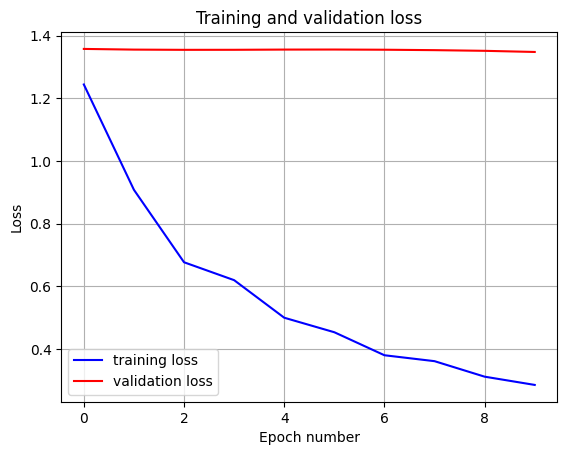

In [14]:
model.save(folder_path + "/model.keras")

plt.plot(history.history['loss'], color = 'blue', label = 'training loss')
plt.plot(history.history['val_loss'], color = 'red', label = 'validation loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.grid(True)
plt.legend()

timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M')
path = folder_path + '/' + timestamp + '_training_validation_loss.png'
plt.savefig(path, format='png', dpi=300)
plt.show()  

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_pred = model.predict(X_test)
pred = test_pred.reshape(-1)
truth = Y_test.reshape(-1)

# computiung mse and mae for ocean points only
mask = X_test.reshape(-1,13)
mask = mask[:, 10] == 1
pred = pred[mask]
truth = truth[mask]

mse = mean_squared_error(pred, truth)
mae = mean_absolute_error(pred, truth)
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
Mean Squared Error: 1.611
Mean Absolute Error: 0.819


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/venv/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/venv/lib/python3.11/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


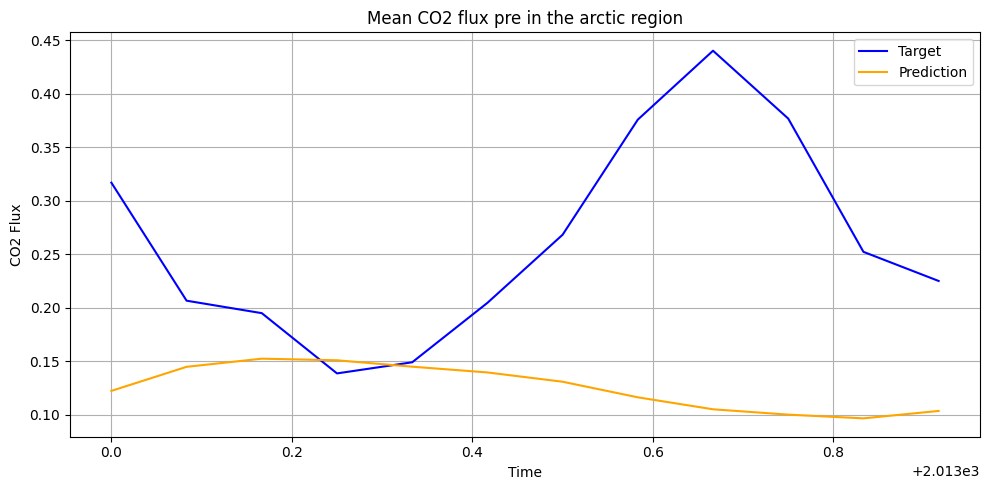

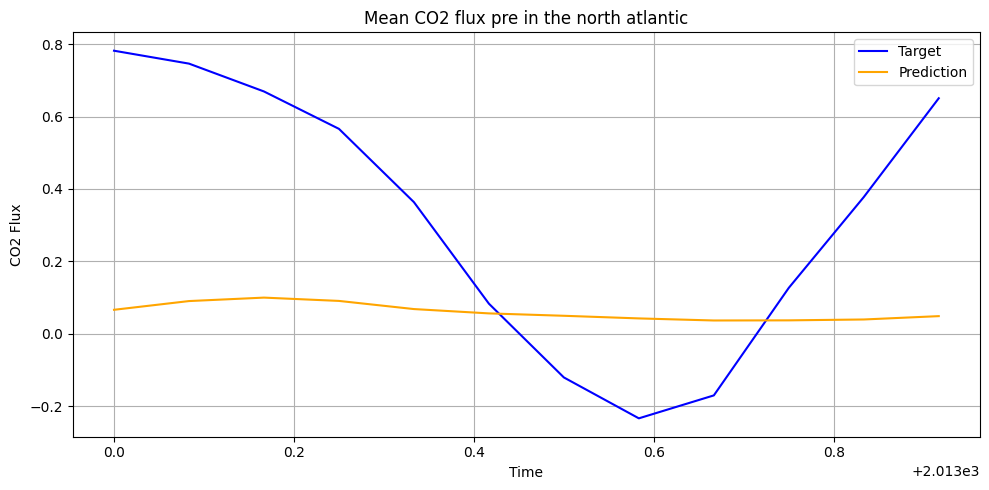

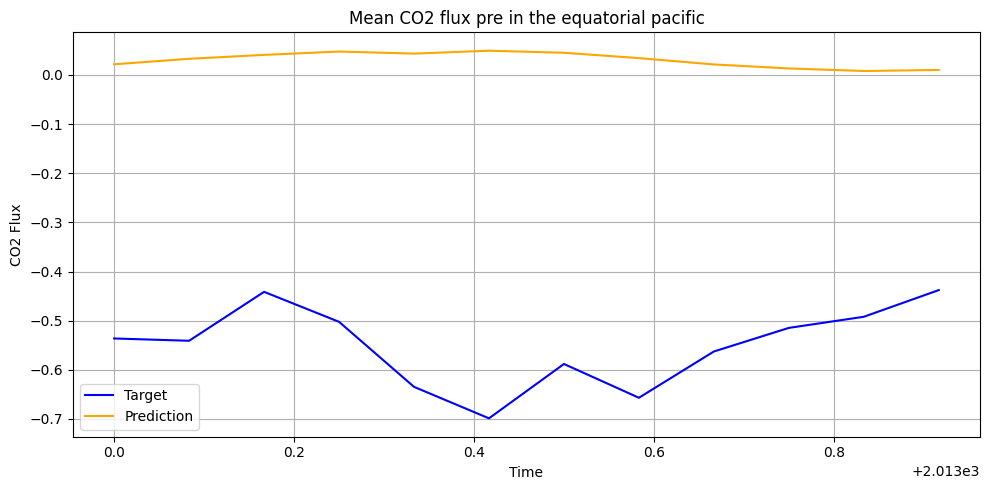

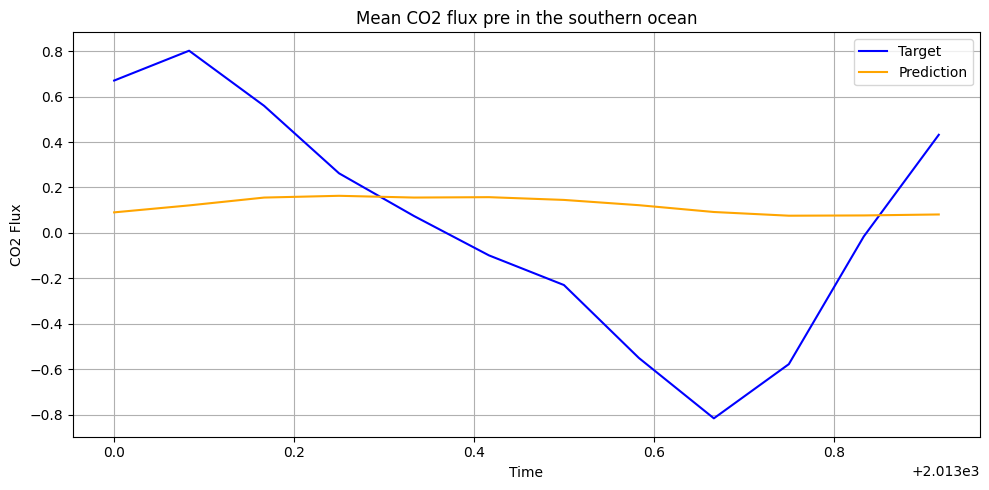

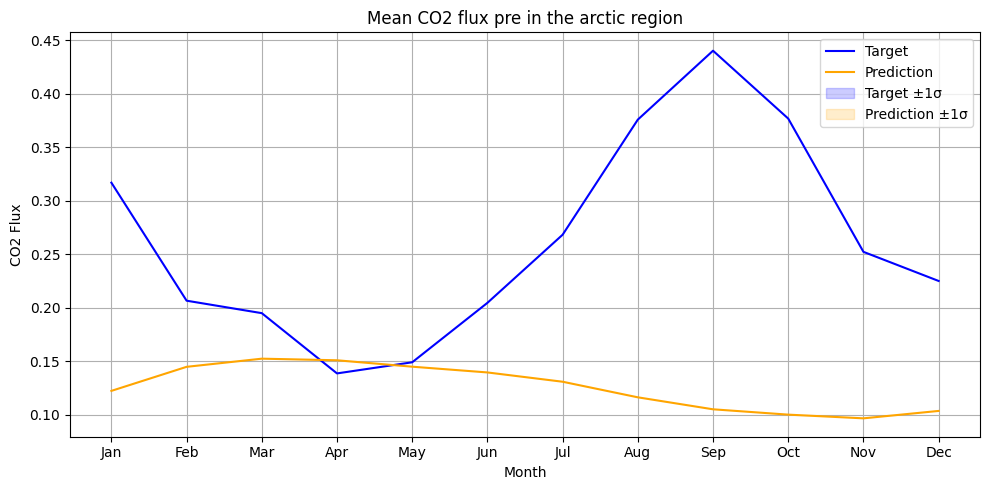

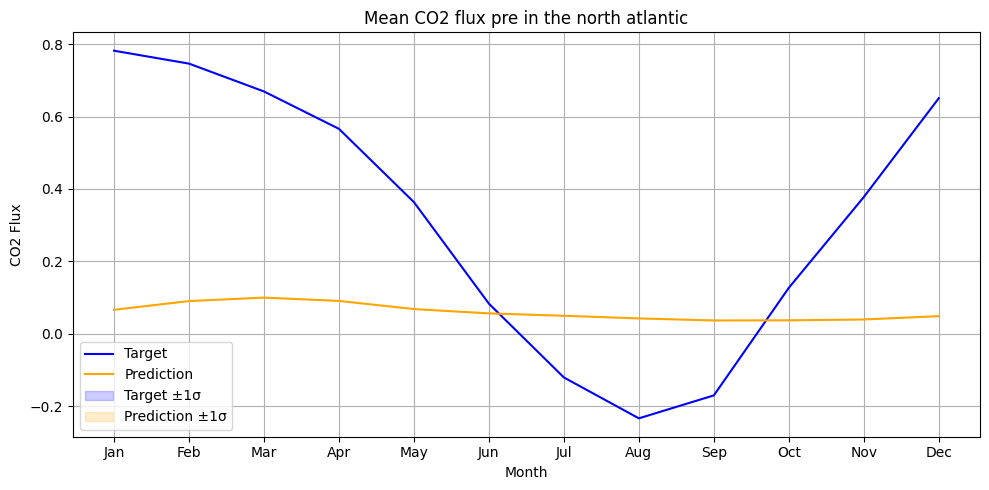

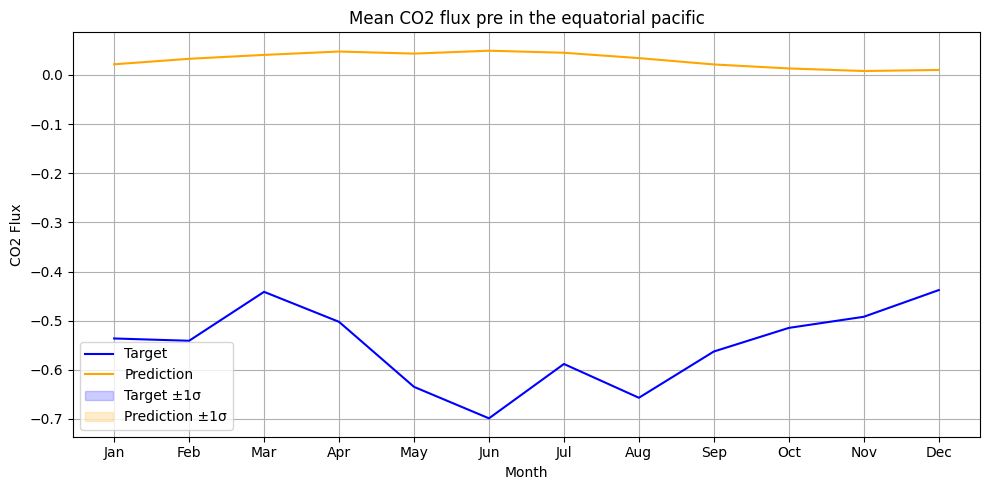

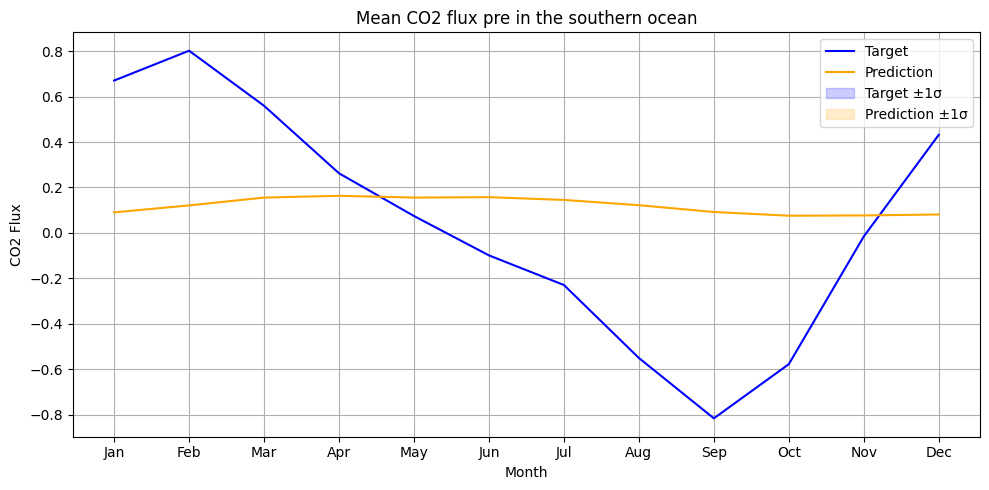

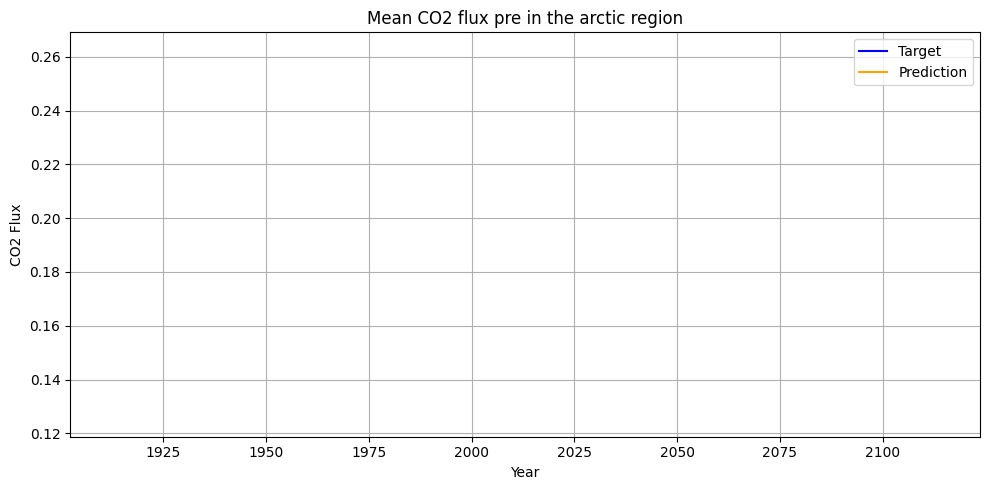

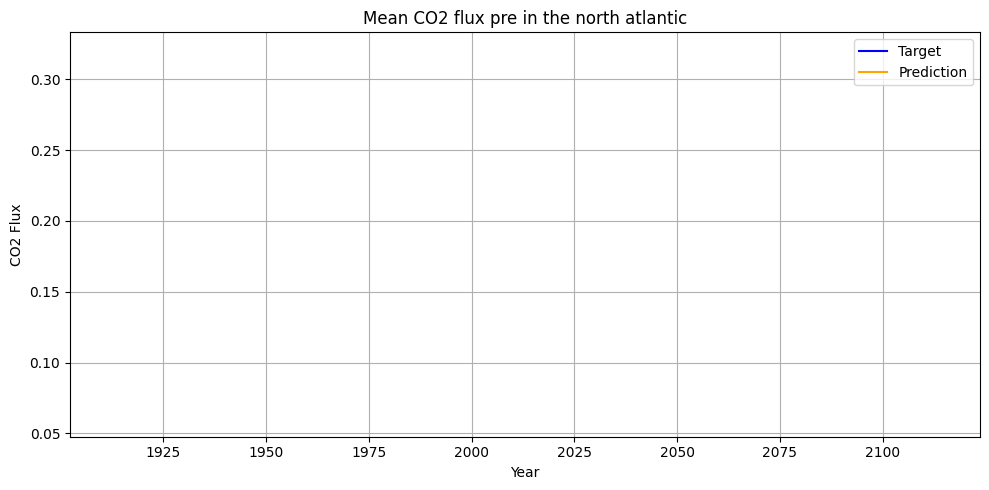

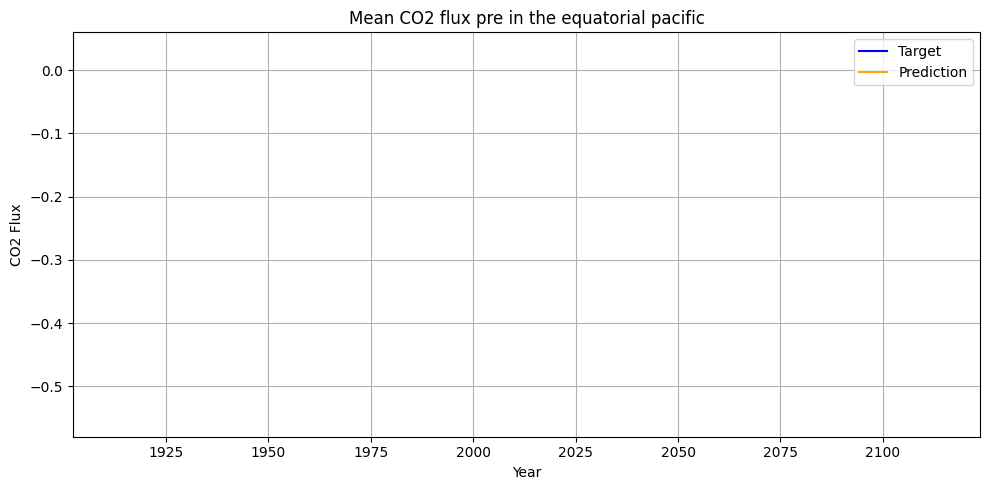

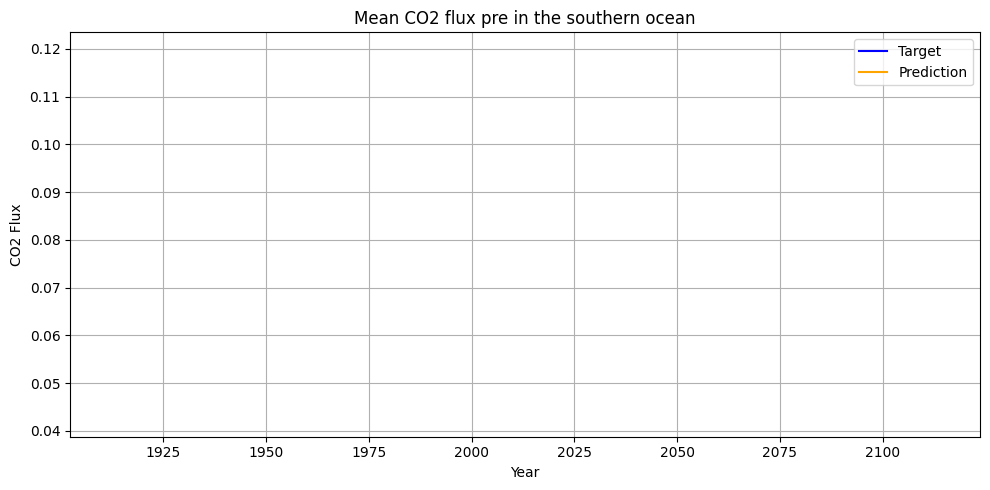

In [16]:
from utils.model_analysis import complete_model_analysis_map

for dataset_id in datasets:
    complete_model_analysis_map(folder_path,dataset_id)